# Working with tabular data: Pandas

Pandas provides three things: 
1. a new data type specifically designed for tabular data - the `DataFrame`
2. functions for manipulating tabular data
3. IO for tabular data (covered in Week3/Files)

## Why yet another data type?
Numpy arrays can hold tabular data - 2D matrices. So why do we need another, special data type?
One problem with raw 2D arrays is that they are not self-documenting. What does that mean?

Take the data from exercise of Week3/Files: We calculated behavioral scores, stored them in a numpy array, and saved the array to a text file:

In [25]:
import numpy as np
# load and print matrix
scores = np.loadtxt('dat/pd_scores.txt')
scores

array([[0.08656877, 0.26186048],
       [0.27081788, 0.48948194],
       [0.47072199, 0.65700287],
       [0.55996639, 0.81680243],
       [0.84880959, 0.98686545],
       [0.91045131, 0.99465925]])

Do you remember what the data means? What are the individual rows? What are the columns? Imagine this were an analysis on your own data and you'd want to look at the results in 3 monts or so.

There are no labels, so it's hard to know from the data itself what they mean - the data is not "self-documenting"

We can turn this into a DataFrame:

In [26]:
import pandas as pd
from pathlib import Path

# the folder names correspond to the days
days = ['20230912','20230913','20230914','20230915','20230916','20230917']

# make DataFrame - no need to understand the specifics - I will explain soon what is going on here
# we can easily turn a dictionary into a DataFrame - keys will be column labels, values are the per-row data
# we can also specify row labels - an index.
scores_dict = {'intial score': scores[:, 0], 'final score': scores[:, 1]}
df = pd.DataFrame(scores_dict, index=days)
df


,intial score,final score
20230912,0.086569,0.261860
20230913,0.270818,0.489482
20230914,0.470722,0.657003
20230915,0.559966,0.816802
20230916,0.848810,0.986865
20230917,0.910451,0.994659


You can save the data frame as csv and excel, and reload them as a DataFrame, with the labels being preserved:

In [27]:
df.to_csv('dat/scores_df.csv')
df.to_excel('dat/scores_df.xlsx')

# load data
df_from_file = pd.read_csv('dat/scores_df.csv', index_col=0)
df_from_file

,intial score,final score
20230912,0.086569,0.261860
20230913,0.270818,0.489482
20230914,0.470722,0.657003
20230915,0.559966,0.816802
20230916,0.848810,0.986865
20230917,0.910451,0.994659


## Creating DataFrames

We already learned that pandas provides versatile file I/O (csv, excel): [https://pandas.pydata.org/docs/user_guide/io.html]() (see Week3/Files)

As shown above, a DataFrame can also easily be created from Dictionary. If we do not specify an index, it will be generated automatically, as a row numbers:

In [28]:
d = {'column 1': [1,2,3], 'column 2': [10, 20, 30]}
print(d)
df = pd.DataFrame(d)
df

{'column 1': [1, 2, 3], 'column 2': [10, 20, 30]}


,column 1,column 2
0,1,10
1,2,20
2,3,30


A DataFrame can also be created from a 2D np.array. In that case, we need to specify the column names separately:

In [29]:
df = pd.DataFrame(scores, columns=['initial', 'final'], index=days)
df

,initial,final
20230912,0.086569,0.261860
20230913,0.270818,0.489482
20230914,0.470722,0.657003
20230915,0.559966,0.816802
20230916,0.848810,0.986865
20230917,0.910451,0.994659


## Accessing data in DataFrames
There are many ways of accessing data in a DataFrame. We cover the basics here.

More details: [https://pandas.pydata.org/docs/user_guide/indexing.html]()

### Access to columns like a dictionary

In [30]:
df['initial']  # df[column_name]

20230912    0.086569
20230913    0.270818
20230914    0.470722
20230915    0.559966
20230916    0.848810
20230917    0.910451
Name: initial, dtype: float64

### Access to rows and columns by name like a 2D dictionary via df.loc

In [31]:
df = pd.DataFrame(scores, columns=['initial', 'final'], index=days)
display(df)

print("by row name: df.loc['20230915']")
print(df.loc['20230915'])

print("this is equivalent to: df.loc['20230915', :]")
print(df.loc['20230915', :])

print("by column name: df.loc[:, 'initial']")
print(df.loc[:, 'initial'])

print("\nby row and column name: df.loc['20230915', 'initial']")
print(df.loc['20230915', 'initial'])

,initial,final
20230912,0.086569,0.261860
20230913,0.270818,0.489482
20230914,0.470722,0.657003
20230915,0.559966,0.816802
20230916,0.848810,0.986865
20230917,0.910451,0.994659


by row name: df.loc['20230915']
initial    0.559966
final      0.816802
Name: 20230915, dtype: float64
this is equivalent to: df.loc['20230915', :]
initial    0.559966
final      0.816802
Name: 20230915, dtype: float64
by column name: df.loc[:, 'initial']
20230912    0.086569
20230913    0.270818
20230914    0.470722
20230915    0.559966
20230916    0.848810
20230917    0.910451
Name: initial, dtype: float64

by row and column name: df.loc['20230915', 'initial']
0.5599663891082376


### Access to rows and columns by index like a 2D array via df.iloc

In [32]:
print(df.iloc[:, 1])
print(df.iloc[1])
print(df.iloc[1, :])
print(df.iloc[2, 1])
print(df.iloc[:2, 1])  # slicing also works

20230912    0.261860
20230913    0.489482
20230914    0.657003
20230915    0.816802
20230916    0.986865
20230917    0.994659
Name: final, dtype: float64
initial    0.270818
final      0.489482
Name: 20230913, dtype: float64
initial    0.270818
final      0.489482
Name: 20230913, dtype: float64
0.6570028706902653
20230912    0.261860
20230913    0.489482
Name: final, dtype: float64


### Access the underlying data like a numpy array:

In [33]:
df.values

array([[0.08656877, 0.26186048],
       [0.27081788, 0.48948194],
       [0.47072199, 0.65700287],
       [0.55996639, 0.81680243],
       [0.84880959, 0.98686545],
       [0.91045131, 0.99465925]])

### Boolean indexing also works

In [34]:
df[df['initial']> 0.4]

,initial,final
20230914,0.470722,0.657003
20230915,0.559966,0.816802
20230916,0.848810,0.986865
20230917,0.910451,0.994659


## Groupby: Split-apply-combine
A common problem in data analysis is:

We have an experiments with multiple subjects, and multiple measurements per subject. We'd like to compute the average score for each subject for plotting and statistics.

For instance:

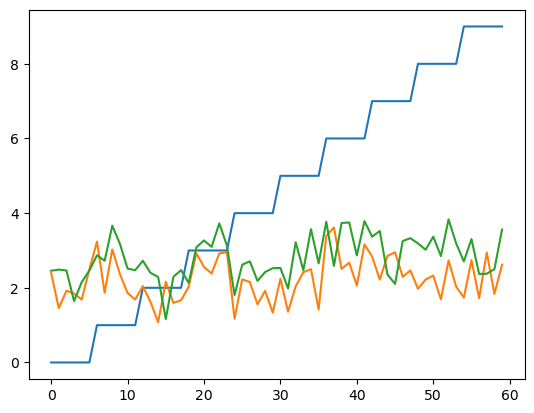

In [35]:
# REMOVE - make dummy data for grouped stats
import matplotlib.pyplot as plt
nb_animals = 10
nb_trials = 6

scores = np.zeros((nb_animals * nb_trials, 3))
for ani, animal in enumerate(range(nb_animals)):
    scores[(ani) * nb_trials:(ani + 1) * nb_trials, 1:] = 2+np.random.randn(nb_trials, 2)/2 + np.array([0.3, 0.8]) + np.random.randn(1) / 2
    scores[(ani) * nb_trials:(ani + 1) * nb_trials, 0] = animal

plt.plot(scores)

df = pd.DataFrame({'animal': scores[:, 0], 'pre': scores[:,1], 'post': scores[:,2]})
df.to_csv('dat/groupby.csv', index=None)

In [36]:
df = pd.read_csv('dat/pd_groupby.csv')
df


,animal,pre,post
0,0.0,2.211986,3.107796
1,0.0,2.204871,2.830730
2,0.0,2.560633,3.483980
3,0.0,1.476412,2.801709
4,0.0,3.662519,3.447005
5,0.0,2.538696,3.301515
6,1.0,1.867229,3.484270
7,1.0,3.306150,3.077195
8,1.0,2.741388,2.586878
9,1.0,1.874149,3.264328




We can solve this using for loops and boolean indexing:


In [37]:
# identify all animals
animals = df['animal'].unique()

# example of boolean indexing
display(df[df['animal']==0.0])
# compute the mean:
display(df[df['animal']==0.0].mean())
display(np.mean(df[df['animal']==0.0], axis=0))

# loop over all animals
animal_avg = []
for animal in animals:
    animal_avg.append(df[df['animal']==animal].mean().values)
animal_avg


,animal,pre,post
0,0.0,2.211986,3.107796
1,0.0,2.204871,2.830730
2,0.0,2.560633,3.483980
3,0.0,1.476412,2.801709
4,0.0,3.662519,3.447005
5,0.0,2.538696,3.301515


animal    0.000000
pre       2.442519
post      3.162122
dtype: float64

animal    0.000000
pre       2.442519
post      3.162122
dtype: float64

[array([0.        , 2.44251943, 3.16212242]),
 array([1.        , 2.73811958, 3.01536034]),
 array([2.        , 3.36372726, 3.62369364]),
 array([3.        , 2.32101921, 2.82037202]),
 array([4.        , 2.03732544, 2.14435453]),
 array([5.        , 1.98184125, 3.0878241 ]),
 array([6.        , 1.35130571, 1.55273191]),
 array([7.        , 3.08961177, 3.51681884]),
 array([8.        , 2.09822498, 2.79135462]),
 array([9.        , 1.9379714 , 2.03333186])]

This series of steps is so common, that it has been implemented in pandas: [https://pandas.pydata.org/docs/user_guide/groupby.html]()

It is applied in two steps: _groupby_ and _aggregate_
1. _groupby_ groups the rows that have the same value in a specific column together
2. _aggregate_ applies a computation that aggregates all data in a group to a single number, like the mean, standard deviation, or max.

Here is an example of this in action. `df.groupby(column_name)` will produce a new object, that groups all rows with the same value in the specified column into a "virtual subtable":

In [38]:
grouped = df.groupby('animal')
print(type(grouped))
grouped.get_group(0)  # get the subtable for all rows where animal==0.0

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,animal,pre,post
0,0.0,2.211986,3.107796
1,0.0,2.204871,2.830730
2,0.0,2.560633,3.483980
3,0.0,1.476412,2.801709
4,0.0,3.662519,3.447005
5,0.0,2.538696,3.301515


Apply the "mean" operation to all values in each subtable and make a new table with the aggregate per-group data:

In [39]:
agg = grouped.aggregate(np.mean)
agg

/var/folders/bc/5m_c7nkj1vnc2w7xmmnhpfww0000gn/T/ipykernel_40103/1479352327.py:1: FutureWarning: The provided callable <function mean at 0x103fd49a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg = grouped.aggregate(np.mean)


,pre,post
animal,,
0.0,2.442519,3.162122
1.0,2.738120,3.015360
2.0,3.363727,3.623694
3.0,2.321019,2.820372
4.0,2.037325,2.144355
5.0,1.981841,3.087824
6.0,1.351306,1.552732
7.0,3.089612,3.516819
8.0,2.098225,2.791355


Plot the result:

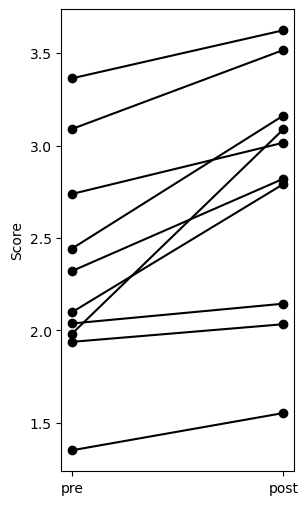

In [40]:
import matplotlib.pyplot as plt

x = np.zeros_like(agg.values).T + [[0], [1]]
y = agg.values.T

plt.figure(figsize=(3, 6))
plt.plot(x, y, 'o-k')
plt.xticks([0, 1], labels=agg.columns)
plt.ylabel('Score')
plt.show()

## Example: Connectomics
The connectome of the (female) fly brain was recently published.

It can be accessed usign a beautiful web interface and user friendly web site: [https://codex.flywire.ai]().

The web site is great for exploring the fly brain, but clicking around in a web browser has limitations in terms of the reproducibility and scale of an analysis.

Therefore, the data was made availabel as a set of tables that can be loaded and processed with pandas.

In the exercise, we will use pandas to answer neuroscience questions about the fly brain - here is a brief introduction to the data:

There are three main tables:
- connections - connections between cells
- classification - cell classes (afferent, intrinsic, efferent), ...
- (labels - human annotations of cell types)

Each neuron has a unique identifier, the root_id. The root_id can be used to track neurons across the different tables.
For instance, to find all neurons of a specific types, and then find their inputs or outputs.

### Classifications and connections
The classification table has basic information about each of the 130k neurons in the fly brain: its the cell_type, side of the brain, position in the brain etc.

In [41]:
classification = pd.read_csv('dat/flywire/classification.csv.gz')
classification

,root_id,flow,super_class,class,sub_class,cell_type,hemibrain_type,hemilineage,side,nerve
0,720575940627005443,intrinsic,optic,L1-5,NaN,L4,NaN,NaN,right,NaN
1,720575940615995398,intrinsic,optic,L1-5,NaN,L4,NaN,NaN,right,NaN
2,720575940621762567,afferent,ascending,AN,NaN,NaN,NaN,NaN,right,CV
3,720575940624384007,afferent,sensory,olfactory,NaN,NaN,ORN_VA1v,NaN,left,AN
4,720575940614422540,intrinsic,central,NaN,NaN,NaN,"AOTU032,AOTU034",LALa1_posterior,right,NaN
...,...,...,...,...,...,...,...,...,...,...
127974,720575940621500404,intrinsic,visual_projection,NaN,NaN,NaN,"LLPC1,LLPC2a,LLPC2b,LLPC2c,LLPC2d,LLPC3",NaN,right,NaN
127975,720575940651646966,intrinsic,central,NaN,NaN,NaN,NaN,LB0_anterior,center,NaN
127976,720575940630151162,intrinsic,optic,optic_lobes,NaN,NaN,NaN,NaN,left,NaN
127977,720575940629364731,intrinsic,optic,optic_lobes,NaN,NaN,NaN,NaN,right,NaN


The connections table contains information about all ~4M synaptic synaptic connections:
- pre_root_id: root_id of the presynaptic neuron, the source
- post_root_id: root_id of the postsynaptic neuron, the target
- syn_count: number of synapses in connection
- nt_type: predicted neurotransmitter neurotransmitter 
- neuropil: target neuropil

In [42]:
connections = pd.read_csv('dat/flywire/connections.csv.gz')
connections

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
0,720575940596125868,720575940608552405,LOP_R,5,ACH
1,720575940596125868,720575940611348834,LOP_R,7,ACH
2,720575940596125868,720575940613059993,LOP_R,5,GLUT
3,720575940596125868,720575940616986553,LOP_R,5,ACH
4,720575940596125868,720575940620124326,LOP_R,8,ACH
...,...,...,...,...,...
3794610,720575940660868737,720575940607206786,ME_L,9,GABA
3794611,720575940660868737,720575940608664873,ME_L,6,GABA
3794612,720575940660868737,720575940611462242,ME_L,6,GABA
3794613,720575940660868737,720575940622913063,ME_L,23,GABA


#### Example: Find neurons of a specific cell type
LC10a is a cluster of higher-order visual neurons required by Drosophila males to track the female during courtship.

We can find all LC10a neurons in the fly brain using boolean indexing into the classification table:

In [43]:
LC10a_neurons =  classification[classification['cell_type']=='LC10a']
LC10a_neurons

,root_id,flow,super_class,class,sub_class,cell_type,hemibrain_type,hemilineage,side,nerve
3035,720575940620720112,intrinsic,visual_projection,NaN,NaN,LC10a,LC10,VPNd2,right,NaN
3691,720575940638285109,intrinsic,visual_projection,NaN,NaN,LC10a,LC10,VPNd2,left,NaN
3737,720575940614430111,intrinsic,visual_projection,NaN,NaN,LC10a,LC10,VPNd2,right,NaN
4456,720575940623082237,intrinsic,visual_projection,NaN,NaN,LC10a,LC10,VPNd2,right,NaN
4544,720575940623868853,intrinsic,visual_projection,NaN,NaN,LC10a,LC10,VPNd2,left,NaN
...,...,...,...,...,...,...,...,...,...,...
125773,720575940631195217,intrinsic,visual_projection,NaN,NaN,LC10a,LC10,VPNd2,left,NaN
126409,720575940631982929,intrinsic,visual_projection,NaN,NaN,LC10a,LC10,VPNd2,left,NaN
126528,720575940631983185,intrinsic,visual_projection,NaN,NaN,LC10a,LC10,VPNd2,left,NaN
126843,720575940627265223,intrinsic,visual_projection,NaN,NaN,LC10a,LC10,VPNd2,left,NaN


#### Example: Find all postsynaptic partners of a given neuron

In [44]:
# select the first neuron in the list and get it's root_id
pre_root_id = LC10a_neurons.iloc[0]['root_id']

# find all downstream targets for that neuron
targets = connections[connections['pre_root_id']==pre_root_id]
targets

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
1309977,720575940620720112,720575940610389873,AOTU_R,10,ACH
1309978,720575940620720112,720575940613946783,AOTU_R,10,ACH
1309979,720575940620720112,720575940614041238,AOTU_R,9,ACH
1309980,720575940620720112,720575940616012061,AOTU_R,26,ACH
1309981,720575940620720112,720575940616169629,AOTU_R,14,ACH
1309982,720575940620720112,720575940616888020,AOTU_R,7,ACH
1309983,720575940620720112,720575940619453861,AOTU_R,5,ACH
1309984,720575940620720112,720575940620321158,AOTU_R,11,ACH
1309985,720575940620720112,720575940621925631,AOTU_R,7,ACH
1309986,720575940620720112,720575940622538520,AOTU_R,24,ACH
